# Project: WeRateDogs

## Introduction

The WeRateDogs project requires gathering three different datasets with three different file formats. The datasets will then need to be assessed to identify any data quality and tidiness issues. There are three parts to the data wrangling process: gather, assess and clean. All the issues will then be cleaned and tidied prior to analysis and visualizations are created. 

The project concludes with analyzing, answering, and visualizing three questions.

## Import Libraries

In [1]:
import pandas as pd
import numpy as np
import requests 
import json
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

## Data Gathering

**Resources for project:**

* WeRateDogs Twitter archive: provided to the project by Udacity, twitter_archive_enhanced.csv
* Tweet image predictions:image_predictions.tsv (programmatically using the Requests library)
    URL: https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv
* Twitter API for retweet and favorite counts: tweet_json.txt (programically using Requests library)
    URL: https://video.udacity-data.com/topher/2018/November/5be5fb7d_tweet-json/tweet-json.txt

### 1. Directly download the WeRateDogs Twitter archive data (twitter_archive_enhanced.csv)

In [2]:
#Read CSV file provided by Udacity for WeRateDogs

twitter_archive = pd.read_csv('twitter-archive-enhanced.csv')

### **2. Use the Requests library to download the tweet image prediction (image_predictions.tsv)**

In [3]:
#Request tsv image_predictions file provided by Udacity
#https://pypi.org/project/requests/

url ='https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)

with open('image-predictions.tsv', mode = 'wb') as file:
    file.write(response.content)

In [4]:
#Read tsv file

image_predictions = pd.read_csv('image-predictions.tsv', sep = '\t')

### **3. Use the Tweepy library to query additional data via the Twitter API (tweet_json.txt)**

In [5]:
#Request tweet_json file provided by Udacity

url ='https://video.udacity-data.com/topher/2018/November/5be5fb7d_tweet-json/tweet-json.txt'
response = requests.get(url)

with open('tweet-json.txt', mode = 'wb') as file:
    file.write(response.content)

In [6]:
#parse JSON
tweet_list = []
with open('tweet-json.txt', mode = 'r') as f:
    for line in f:
        tweet_list.append(json.loads(line))
        
#create df        
tweet_json= pd.DataFrame(tweet_list)

Resource: [loading/parsing Json](https://stackoverflow.com/questions/12451431/loading-and-parsing-a-json-file-with-multiple-json-objects)

## Assessing Data

**Note:**

* Project requires only original tweet ratings for dogs that have images.
* Rating numerators are greater than the denominators. This [unique rating system](http://knowyourmeme.com/memes/theyre-good-dogs-brent) is a big part of the popularity of WeRateDogs.




### **Assess twitter_archive**

In [7]:
twitter_archive.head(1)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None


**Observations:**

1. There are retweet column headers. Only orginal tweets are wanted for this analysis.  
2. The timestamp column includes "+0000" as its value and needs to be removed.

In [8]:
twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

**Observations:**  

1. timestamp's dtype is object and not datetime.  
2. date and time are in a single col.  
3. doggo, floofer, pupper, puppo are in separate cols.  

In [9]:
#nunique will return an integer that tells you how many distinct values a column contains.
#unique will return a pd.Series containing the actual distinct values themselves.

twitter_archive.nunique()

tweet_id                      2356
in_reply_to_status_id           77
in_reply_to_user_id             31
timestamp                     2356
source                           4
text                          2356
retweeted_status_id            181
retweeted_status_user_id        25
retweeted_status_timestamp     181
expanded_urls                 2218
rating_numerator                40
rating_denominator              18
name                           957
doggo                            2
floofer                          2
pupper                           2
puppo                            2
dtype: int64

In [10]:
twitter_archive.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


**Observation:**

1. There are denominators !=10

In [11]:
#Explore entries where denominators are !=10

twitter_archive.query('rating_denominator !=10')

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
313,835246439529840640,8.352460e+17,2.625958e+07,2017-02-24 21:54:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@jonnysun @Lin_Manuel ok jomny I know you're e...,NaN,NaN,NaN,NaN,960,0,None,None,None,None,None
342,832088576586297345,8.320875e+17,3.058208e+07,2017-02-16 04:45:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@docmisterio account started on 11/15/15,NaN,NaN,NaN,NaN,11,15,None,None,None,None,None
433,820690176645140481,NaN,NaN,2017-01-15 17:52:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",The floofs have been released I repeat the flo...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/820690176...,84,70,None,None,None,None,None
516,810984652412424192,NaN,NaN,2016-12-19 23:06:23 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Sam. She smiles 24/7 &amp; secretly aspir...,NaN,NaN,NaN,"https://www.gofundme.com/sams-smile,https://tw...",24,7,Sam,None,None,None,None
784,775096608509886464,NaN,NaN,2016-09-11 22:20:06 +0000,"<a href=""http://twitter.com/download/iphone"" r...","RT @dog_rates: After so many requests, this is...",7.403732e+17,4.196984e+09,2016-06-08 02:41:38 +0000,https://twitter.com/dog_rates/status/740373189...,9,11,None,None,None,None,None
902,758467244762497024,NaN,NaN,2016-07-28 01:00:57 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Why does this never happen at my front door......,NaN,NaN,NaN,https://twitter.com/dog_rates/status/758467244...,165,150,None,None,None,None,None
1068,740373189193256964,NaN,NaN,2016-06-08 02:41:38 +0000,"<a href=""http://twitter.com/download/iphone"" r...","After so many requests, this is Bretagne. She ...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/740373189...,9,11,None,None,None,None,None
1120,731156023742988288,NaN,NaN,2016-05-13 16:15:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to this unbelievably well behaved sq...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/731156023...,204,170,this,None,None,None,None
1165,722974582966214656,NaN,NaN,2016-04-21 02:25:47 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Happy 4/20 from the squad! 13/10 for all https...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/722974582...,4,20,None,None,None,None,None
1202,716439118184652801,NaN,NaN,2016-04-03 01:36:11 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Bluebert. He just saw that both #Final...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/716439118...,50,50,Bluebert,None,None,None,None


In [15]:
#Total number of entries with denominators !=10

twitter_archive.query('rating_denominator !=10')['rating_denominator'].value_counts().sum()

23

In [12]:
#Find out total number of unique denoimnator values !=10

twitter_archive.query('rating_denominator !=10')['rating_denominator'].nunique()

17

In [13]:
#Denominator values !=10

twitter_archive.query('rating_denominator !=10')['rating_denominator'].unique()

array([  0,  15,  70,   7,  11, 150, 170,  20,  50,  90,  80,  40, 130,
       110,  16, 120,   2])

In [14]:
#Number of each denomniator values !=10

twitter_archive.query('rating_denominator !=10')['rating_denominator'].value_counts()

50     3
11     3
20     2
80     2
90     1
40     1
130    1
2      1
70     1
7      1
110    1
170    1
120    1
15     1
16     1
150    1
0      1
Name: rating_denominator, dtype: int64

In [16]:
#explore text for the entries with denominators !=10

pd.set_option("display.max_colwidth", -1)
twitter_archive.query('rating_denominator !=10')[['tweet_id', 'text', 'rating_numerator', 'rating_denominator']]

,tweet_id,text,rating_numerator,rating_denominator
313,835246439529840640,"@jonnysun @Lin_Manuel ok jomny I know you're excited but 960/00 isn't a valid rating, 13/10 is tho",960,0
342,832088576586297345,@docmisterio account started on 11/15/15,11,15
433,820690176645140481,The floofs have been released I repeat the floofs have been released. 84/70 https://t.co/NIYC820tmd,84,70
516,810984652412424192,Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. \nKeep Sam smiling by clicking and sharing this link:\nhttps://t.co/98tB8y7y7t https://t.co/LouL5vdvxx,24,7
784,775096608509886464,"RT @dog_rates: After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https:/…",9,11
902,758467244762497024,Why does this never happen at my front door... 165/150 https://t.co/HmwrdfEfUE,165,150
1068,740373189193256964,"After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https://t.co/XAVDNDaVgQ",9,11
1120,731156023742988288,Say hello to this unbelievably well behaved squad of doggos. 204/170 would try to pet all at once https://t.co/yGQI3He3xv,204,170
1165,722974582966214656,Happy 4/20 from the squad! 13/10 for all https://t.co/eV1diwds8a,4,20
1202,716439118184652801,This is Bluebert. He just saw that both #FinalFur match ups are split 50/50. Amazed af. 11/10 https://t.co/Kky1DPG4iq,50,50


**Observavtions:**

1. Some of the rating numerators and denominators are incorrect.   
2. The tweets use the first two numerical values in the text entries as the numerators and denominators rather than the tweeter's rating.   
3. The text col contains extra url information.



### **Assess tweet_json**

In [17]:

tweet_json.head(1)

,contributors,coordinates,created_at,display_text_range,entities,extended_entities,favorite_count,favorited,full_text,geo,...,possibly_sensitive_appealable,quoted_status,quoted_status_id,quoted_status_id_str,retweet_count,retweeted,retweeted_status,source,truncated,user
0,None,None,Tue Aug 01 16:23:56 +0000 2017,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions': [], 'urls': [], 'media': [{'id': 892420639486877696, 'id_str': '892420639486877696', 'indices': [86, 109], 'media_url': 'http://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg', 'media_url_https': 'https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg', 'url': 'https://t.co/MgUWQ76dJU', 'display_url': 'pic.twitter.com/MgUWQ76dJU', 'expanded_url': 'https://twitter.com/dog_rates/status/892420643555336193/photo/1', 'type': 'photo', 'sizes': {'large': {'w': 540, 'h': 528, 'resize': 'fit'}, 'thumb': {'w': 150, 'h': 150, 'resize': 'crop'}, 'small': {'w': 540, 'h': 528, 'resize': 'fit'}, 'medium': {'w': 540, 'h': 528, 'resize': 'fit'}}}]}","{'media': [{'id': 892420639486877696, 'id_str': '892420639486877696', 'indices': [86, 109], 'media_url': 'http://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg', 'media_url_https': 'https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg', 'url': 'https://t.co/MgUWQ76dJU', 'display_url': 'pic.twitter.com/MgUWQ76dJU', 'expanded_url': 'https://twitter.com/dog_rates/status/892420643555336193/photo/1', 'type': 'photo', 'sizes': {'large': {'w': 540, 'h': 528, 'resize': 'fit'}, 'thumb': {'w': 150, 'h': 150, 'resize': 'crop'}, 'small': {'w': 540, 'h': 528, 'resize': 'fit'}, 'medium': {'w': 540, 'h': 528, 'resize': 'fit'}}}]}",39467,False,This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,None,...,False,NaN,NaN,NaN,8853,False,NaN,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",False,"{'id': 4196983835, 'id_str': '4196983835', 'name': 'WeRateDogs™ (author)', 'screen_name': 'dog_rates', 'location': 'DM YOUR DOGS, WE WILL RATE', 'description': '#1 Source for Professional Dog Ratings | STORE: @ShopWeRateDogs | IG, FB & SC: WeRateDogs MOBILE APP: @GoodDogsGame | Business: dogratingtwitter@gmail.com', 'url': 'https://t.co/N7sNNHAEXS', 'entities': {'url': {'urls': [{'url': 'https://t.co/N7sNNHAEXS', 'expanded_url': 'http://weratedogs.com', 'display_url': 'weratedogs.com', 'indices': [0, 23]}]}, 'description': {'urls': []}}, 'protected': False, 'followers_count': 3200889, 'friends_count': 104, 'listed_count': 2784, 'created_at': 'Sun Nov 15 21:41:29 +0000 2015', 'favourites_count': 114031, 'utc_offset': None, 'time_zone': None, 'geo_enabled': True, 'verified': True, 'statuses_count': 5288, 'lang': 'en', 'contributors_enabled': False, 'is_translator': False, 'is_translation_enabled': False, 'profile_background_color': '000000', 'profile_background_image_url': 'http://abs.twimg.com/images/themes/theme1/bg.png', 'profile_background_image_url_https': 'https://abs.twimg.com/images/themes/theme1/bg.png', 'profile_background_tile': False, 'profile_image_url': 'http://pbs.twimg.com/profile_images/861415328504569856/R2xOOfwe_normal.jpg', 'profile_image_url_https': 'https://pbs.twimg.com/profile_images/861415328504569856/R2xOOfwe_normal.jpg', 'profile_banner_url': 'https://pbs.twimg.com/profile_banners/4196983835/1501129017', 'profile_link_color': 'F5ABB5', 'profile_sidebar_border_color': '000000', 'profile_sidebar_fill_color': '000000', 'profile_text_color': '000000', 'profile_use_background_image': False, 'has_extended_profile': True, 'default_profile': False, 'default_profile_image': False, 'following': True, 'follow_request_sent': False, 'notifications': False, 'translator_type': 'none'}"


**Observation:**

1. A number of colums contain superfluous information and will need to be removed. 

In [18]:
tweet_json.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 31 columns):
contributors                     0 non-null object
coordinates                      0 non-null object
created_at                       2354 non-null object
display_text_range               2354 non-null object
entities                         2354 non-null object
extended_entities                2073 non-null object
favorite_count                   2354 non-null int64
favorited                        2354 non-null bool
full_text                        2354 non-null object
geo                              0 non-null object
id                               2354 non-null int64
id_str                           2354 non-null object
in_reply_to_screen_name          78 non-null object
in_reply_to_status_id            78 non-null float64
in_reply_to_status_id_str        78 non-null object
in_reply_to_user_id              78 non-null float64
in_reply_to_user_id_str          78 non-null obj

In [19]:
tweet_json.id[0:10]

0    892420643555336193
1    892177421306343426
2    891815181378084864
3    891689557279858688
4    891327558926688256
5    891087950875897856
6    890971913173991426
7    890729181411237888
8    890609185150312448
9    890240255349198849
Name: id, dtype: int64

In [20]:
twitter_archive.tweet_id[0:10]

0    892420643555336193
1    892177421306343426
2    891815181378084864
3    891689557279858688
4    891327558926688256
5    891087950875897856
6    890971913173991426
7    890729181411237888
8    890609185150312448
9    890240255349198849
Name: tweet_id, dtype: int64

**Observation:**

1.The tweet_jason id col is same as twitter_archive tweet_id.

### **Assess image_predictions**

Image_predictions column key:  
  
- p1 is the algorithm's #1 prediction for the image in the tweet → golden retriever  
- p1_conf is how confident the algorithm is in its #1 prediction → 95%  
- p1_dog is whether or not the #1 prediction is a breed of dog → TRUE  

In [21]:
image_predictions.head(1)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True


**Observations:**

1. There are more columns than needed in the table.  
2. The p1 and p1_conf col names are not properly descriptive.

## Assessment Summary

### Quality issues  

twitter_archive  

1. Not all of the cols are needed for this analysis.
2. The data includes retweets which are not needed for this analysis.
3. The timestamp col includes extra numbers and is a str dtype, not datetime.
4. The timestamp col's date and time are in one col.
5. Some of the rating numerators and denominators are incorrect.
6. The text col contains extra url information.  

twitter_json

8. Not all of the cols are needed for this analysis.  
9. The twitter_id col is named id.  

image_predictions  

10. Not all of the cols are needed for this analysis. 
11. The p1 and p1_conf col names are not properly descriptive.

### Tidiness issues
1. The twitter_archive's doggo, floofer, pupper and puppo cols are separate, but should be a in a single col.
2. Information from the three different tables should be in a single table. 

## Cleaning Data 

**Note:**
Document cleaning process as follows: Issue, Define, Code, Test.

In [22]:
# Make copies of original pieces of data

twitter_archive_clean = twitter_archive.copy()
image_predictions_clean = image_predictions.copy()
tweet_json_clean = tweet_json.copy()

### Issue #1: twitter_archive_clean, The data includes retweets which are not needed for this analysis.

In [23]:
#Recall .info() for twitter_archive_clean

twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

#### Define

Use .isnull() to identify rows with a retweeted_status_id of NaN and keep only those rows; removing retweets.

#### Code

In [24]:
twitter_archive_clean = twitter_archive_clean[twitter_archive_clean.retweeted_status_id.isnull()]

#### Test

In [25]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2175 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2175 non-null object
source                        2175 non-null object
text                          2175 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 2117 non-null object
rating_numerator              2175 non-null int64
rating_denominator            2175 non-null int64
name                          2175 non-null object
doggo                         2175 non-null object
floofer                       2175 non-null object
pupper                        2175 non-null object
puppo                         2175 non-null object
dtypes: float64(4), int64(3), object(1

**Observation:**
1. .info() shows that all retweet statuses have zero entries.

### Issue #2: twitter_archive_clean, Not all of the cols are needed for this analysis.

#### Define: 

Drop all cols that are not needed for this analysis; df.drop()

- 'in_reply_to_status_id',
- 'in_reply_to_user_id',
- 'source',
- 'retweeted_status_id',
- 'retweeted_status_user_id',
- 'retweeted_status_timestamp',
- 'expanded_urls'

#### Code

In [26]:
twitter_archive_clean = twitter_archive_clean.drop(['in_reply_to_status_id',
                                            'in_reply_to_user_id',
                                            'source',
                                            'retweeted_status_id',
                                            'retweeted_status_user_id',
                                            'retweeted_status_timestamp',
                                            'expanded_urls'], axis=1)

#### Test

In [27]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 10 columns):
tweet_id              2175 non-null int64
timestamp             2175 non-null object
text                  2175 non-null object
rating_numerator      2175 non-null int64
rating_denominator    2175 non-null int64
name                  2175 non-null object
doggo                 2175 non-null object
floofer               2175 non-null object
pupper                2175 non-null object
puppo                 2175 non-null object
dtypes: int64(3), object(7)
memory usage: 186.9+ KB


**Observation:**
1. .info() shows that the df now contains only the needed cols.

Resources: [df.drop](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.drop.html), [breaking up lines of code](https://www.pythonmorsels.com/breaking-long-lines-code-python/)

### Issue #3: twitter_archive_clean, The timestamp col includes extra numbers (+0000) and dtype is not datetime.

**Define:**

Remove +0000 from timestamp and convert to datetime using pd.to_datetime()

**Code:**

In [28]:
#Remove +0000 from timestamp (part 1)

twitter_archive_clean.timestamp = twitter_archive_clean.timestamp.str[:-6]

In [29]:
#Convert to dtype datetime (part 2)

twitter_archive_clean.timestamp = pd.to_datetime(twitter_archive_clean.timestamp)

**Test:**

In [30]:
twitter_archive_clean.head(1)

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,2017-08-01 16:23:56,This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,13,10,Phineas,None,None,None,None


In [31]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 10 columns):
tweet_id              2175 non-null int64
timestamp             2175 non-null datetime64[ns]
text                  2175 non-null object
rating_numerator      2175 non-null int64
rating_denominator    2175 non-null int64
name                  2175 non-null object
doggo                 2175 non-null object
floofer               2175 non-null object
pupper                2175 non-null object
puppo                 2175 non-null object
dtypes: datetime64[ns](1), int64(3), object(6)
memory usage: 186.9+ KB


**Observations:**
1. .head() displays the the adjusted date and time.  
2. .info() shows that timestamp dtype is now datetime.

Resource: [remove from timestamp](https://stackoverflow.com/questions/56556652/remove-specific-characters-from-time-stamp)

### Issue #4: twitter_archive_clean, The timestamp col's date and time are in one col.

**Define:**

Split the timestamp into separate date and time cols.

**Code:**

In [32]:
#Separate into two columns

twitter_archive_clean['date'] = pd.to_datetime(twitter_archive_clean['timestamp']).dt.date
twitter_archive_clean['time'] = pd.to_datetime(twitter_archive_clean['timestamp']).dt.time

In [33]:
#Drop the old timestamp col since it's no longer needed

twitter_archive_clean = twitter_archive_clean.drop('timestamp', axis=1)

In [34]:
#Move date and time cols to after tweet_id; original location

twitter_archive_clean = twitter_archive_clean[['tweet_id', 
                                               'date', 
                                               'time', 
                                               'text', 
                                               'rating_numerator', 
                                               'rating_denominator', 
                                               'name', 
                                               'doggo', 
                                               'floofer', 
                                               'pupper', 
                                               'puppo']]

**Test:**

In [35]:
twitter_archive_clean.head(1)

,tweet_id,date,time,text,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,2017-08-01,16:23:56,This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,13,10,Phineas,None,None,None,None


**Observation:**
1. .head() shows that date and time are now separate cols and timestamp col was dropped.

### Issue #5: twitter_archive_clean, Some of the rating numerators and denominators are incorrect

**Define:**

Recall all entries with a denominator !=10. Correct the ratings based on earlier exploration; use correct ratings from text col and remove non-ratings based rows.

**Code:**

In [36]:
#Find rows where denominator !=10

twitter_archive_clean.query('rating_denominator !=10')

,tweet_id,date,time,text,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
313,835246439529840640,2017-02-24,21:54:03,"@jonnysun @Lin_Manuel ok jomny I know you're excited but 960/00 isn't a valid rating, 13/10 is tho",960,0,None,None,None,None,None
342,832088576586297345,2017-02-16,04:45:50,@docmisterio account started on 11/15/15,11,15,None,None,None,None,None
433,820690176645140481,2017-01-15,17:52:40,The floofs have been released I repeat the floofs have been released. 84/70 https://t.co/NIYC820tmd,84,70,None,None,None,None,None
516,810984652412424192,2016-12-19,23:06:23,Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. \nKeep Sam smiling by clicking and sharing this link:\nhttps://t.co/98tB8y7y7t https://t.co/LouL5vdvxx,24,7,Sam,None,None,None,None
902,758467244762497024,2016-07-28,01:00:57,Why does this never happen at my front door... 165/150 https://t.co/HmwrdfEfUE,165,150,None,None,None,None,None
1068,740373189193256964,2016-06-08,02:41:38,"After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https://t.co/XAVDNDaVgQ",9,11,None,None,None,None,None
1120,731156023742988288,2016-05-13,16:15:54,Say hello to this unbelievably well behaved squad of doggos. 204/170 would try to pet all at once https://t.co/yGQI3He3xv,204,170,this,None,None,None,None
1165,722974582966214656,2016-04-21,02:25:47,Happy 4/20 from the squad! 13/10 for all https://t.co/eV1diwds8a,4,20,None,None,None,None,None
1202,716439118184652801,2016-04-03,01:36:11,This is Bluebert. He just saw that both #FinalFur match ups are split 50/50. Amazed af. 11/10 https://t.co/Kky1DPG4iq,50,50,Bluebert,None,None,None,None
1228,713900603437621249,2016-03-27,01:29:02,Happy Saturday here's 9 puppers on a bench. 99/90 good work everybody https://t.co/mpvaVxKmc1,99,90,None,None,None,None,None


In [37]:
#Ratings are base 10. Correct numerator and denominators based on rating in text.

def correct_ratings():
    
    id_num = [835246439529840640, 820690176645140481, 775096608509886464, 758467244762497024, 740373189193256964, 731156023742988288,
             722974582966214656, 716439118184652801, 713900603437621249, 710658690886586372, 709198395643068416, 704054845121142784,
             697463031882764288, 684225744407494656, 684222868335505415, 682962037429899265, 677716515794329600,
             675853064436391936, 666287406224695296]
    numerator = [13, 12, 14, 11, 14, 12, 13, 11, 11, 10, 9, 12, 11, 11, 11, 10, 12, 11, 9]
    
    for id_num, numerator in zip(id_num, numerator):
        twitter_archive_clean.loc[twitter_archive_clean['tweet_id'] == id_num, 'rating_numerator'] = numerator
        twitter_archive_clean.loc[twitter_archive_clean['tweet_id'] == id_num, 'rating_denominator'] = 10
    
correct_ratings()   

**Observation:**
1. Upon exmaining the text col, not all contained ratings; remove these rows.

In [38]:
#Remove non-rating rows.

def drop_ratings():
    
    id_num = [832088576586297345, 810984652412424192, 686035780142297088, 682808988178739200] 
  
    
    for id_num in id_num:
        twitter_archive_clean.drop(twitter_archive_clean[twitter_archive_clean['tweet_id'] == id_num].index, inplace = True)
    
drop_ratings()   

**Test:**

In [39]:
twitter_archive_clean.query('rating_denominator !=10')

,tweet_id,date,time,text,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


Resources: [zip use in for loop](https://stackoverflow.com/questions/18648626/for-loop-with-two-variables)

### Issue #6: tweet_json_clean, Not all of the cols are needed for this analysis.

**Define:**

Create dataframe with only the id, favorite_count and retweet_count cols.

**Code:**

In [40]:
#Keep only id, favorite_count, retweet_count

tweet_json_clean = tweet_json_clean[['id', 'favorite_count', 'retweet_count']].copy()

**Test:**

In [41]:
tweet_json_clean.head()

,id,favorite_count,retweet_count
0,892420643555336193,39467,8853
1,892177421306343426,33819,6514
2,891815181378084864,25461,4328
3,891689557279858688,42908,8964
4,891327558926688256,41048,9774


### Issue #7: The twitter_id col is named id.

**Define:**

Need to rename id col to match other tables; tweet_id.

**Code:**

In [42]:
tweet_json_clean.rename(columns={'id': 'tweet_id'} , inplace = True)

**Test:**

In [43]:
tweet_json_clean.head()

,tweet_id,favorite_count,retweet_count
0,892420643555336193,39467,8853
1,892177421306343426,33819,6514
2,891815181378084864,25461,4328
3,891689557279858688,42908,8964
4,891327558926688256,41048,9774


### Issue #8, image_predictions_clean, Not all of the cols are needed for this analysis.

**Define:**

Create a dataframe with only the tweet_id, p1, p1_conf, and p1_dog cols. 

In [44]:
image_predictions_clean.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


**Code:**

In [45]:
image_predictions_clean = image_predictions_clean[['tweet_id', 'p1', 'p1_conf', 'p1_dog' ]].copy()

**Test:**

In [46]:
image_predictions_clean.head()

,tweet_id,p1,p1_conf,p1_dog
0,666020888022790149,Welsh_springer_spaniel,0.465074,True
1,666029285002620928,redbone,0.506826,True
2,666033412701032449,German_shepherd,0.596461,True
3,666044226329800704,Rhodesian_ridgeback,0.408143,True
4,666049248165822465,miniature_pinscher,0.560311,True


### Issue #9: image_predictions_clean, the p1 and p1_conf col names are not properly descriptive.

**Define:**

Rename cols p1 and p1_conf to be more descriptive; p1 to breed, p1_conf to confidence level

**Code:**

In [47]:
image_predictions_clean.rename(columns = {'p1': 'breed', 'p1_conf': 'confidence_level'}, inplace = True)

**Test:**

In [48]:
image_predictions_clean.head()

,tweet_id,breed,confidence_level,p1_dog
0,666020888022790149,Welsh_springer_spaniel,0.465074,True
1,666029285002620928,redbone,0.506826,True
2,666033412701032449,German_shepherd,0.596461,True
3,666044226329800704,Rhodesian_ridgeback,0.408143,True
4,666049248165822465,miniature_pinscher,0.560311,True


### Issue #10: image_predictions_clean, some of the images are not of dogs and need to be removed.

**Define:**

Remove rows with non-dog images.

**Code:**

In [49]:
#p1_dog = True if prediction is a dog; Find rows where p1_dog !=True
#first ten rows displayed to conserve space

image_predictions_clean.query('p1_dog !=True')[0:10]

,tweet_id,breed,confidence_level,p1_dog
6,666051853826850816,box_turtle,0.933012,False
8,666057090499244032,shopping_cart,0.962465,False
17,666104133288665088,hen,0.965932,False
18,666268910803644416,desktop_computer,0.086502,False
21,666293911632134144,three-toed_sloth,0.914671,False
22,666337882303524864,ox,0.416669,False
25,666362758909284353,guinea_pig,0.996496,False
29,666411507551481857,coho,0.404640,False
33,666430724426358785,llama,0.505184,False
43,666776908487630848,seat_belt,0.375057,False


In [50]:
#Remove all rows where p1_dog value is False (not a dog)

image_predictions_clean.drop(image_predictions_clean[image_predictions_clean['p1_dog'] !=True].index, inplace = True)

**Test:**

In [51]:
image_predictions_clean.query('p1_dog !=True')

,tweet_id,breed,confidence_level,p1_dog


In [52]:
#No longer need p1_dog

image_predictions_clean = image_predictions_clean[['tweet_id', 'breed', 'confidence_level']].copy()

In [53]:
image_predictions_clean.head()

,tweet_id,breed,confidence_level
0,666020888022790149,Welsh_springer_spaniel,0.465074
1,666029285002620928,redbone,0.506826
2,666033412701032449,German_shepherd,0.596461
3,666044226329800704,Rhodesian_ridgeback,0.408143
4,666049248165822465,miniature_pinscher,0.560311


In [54]:
#Quick check on breeds 
#first ten rows displayed to conserve space

image_predictions_clean.breed.value_counts()[0:10]

golden_retriever      150
Labrador_retriever    100
Pembroke              89 
Chihuahua             83 
pug                   57 
chow                  44 
Samoyed               43 
toy_poodle            39 
Pomeranian            38 
cocker_spaniel        30 
Name: breed, dtype: int64

### Tidiness Issue #1: The twitter_archive_clean, the doggo, floofer, pupper and puppo cols are separate, but should be a in a single col.

**Define:**

Merge the doggo, floofer, pupper, and puppo col values into a single col and remove the individual cols.  
For further clarity, remove any rows where dog stages are a combination of stages. 

**Code:**

In [55]:
#Step1: replace the 'None' value with '' (blanks).

def replace_none():
    columns = ['doggo','floofer', 'pupper', 'puppo']
    
    for x in columns:
        twitter_archive_clean[x].replace('None', '', inplace=True)

replace_none()

In [56]:
#Step2: combine doggo, floofer, pupper, puppo cols into dog_stages col

twitter_archive_clean['dog_stages'] = twitter_archive_clean['doggo'] + twitter_archive_clean['floofer'] + twitter_archive_clean['pupper'] + twitter_archive_clean['puppo']

In [57]:
#Step3: replace '' value with NaN

twitter_archive_clean['dog_stages'] = twitter_archive_clean['dog_stages'].replace('', np.nan)

In [58]:
#Step4: drop the individual cols

twitter_archive_clean = twitter_archive_clean.drop(['doggo',
                                                    'floofer',
                                                    'pupper',
                                                    'puppo'], axis=1)

**Test:**

In [59]:
twitter_archive_clean.head()

,tweet_id,date,time,text,rating_numerator,rating_denominator,name,dog_stages
0,892420643555336193,2017-08-01,16:23:56,This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,13,10,Phineas,NaN
1,892177421306343426,2017-08-01,00:17:27,"This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",13,10,Tilly,NaN
2,891815181378084864,2017-07-31,00:18:03,This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,12,10,Archie,NaN
3,891689557279858688,2017-07-30,15:58:51,This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,13,10,Darla,NaN
4,891327558926688256,2017-07-29,16:00:24,"This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",12,10,Franklin,NaN


In [60]:
twitter_archive_clean.dog_stages.value_counts()

pupper          224
doggo           75 
puppo           24 
doggopupper     10 
floofer         9  
doggopuppo      1  
doggofloofer    1  
Name: dog_stages, dtype: int64

In [61]:
#Simplify the values and get rid of rows where the dog_stages are a combination of stages.

#define values
values = ['pupper', 'doggo', 'puppo', 'floofer']

#keep only the rows that contain values in the list
twitter_archive_clean = twitter_archive_clean[twitter_archive_clean.dog_stages.isin(values) == True]
twitter_archive_clean.dog_stages.value_counts()

pupper     224
doggo      75 
puppo      24 
floofer    9  
Name: dog_stages, dtype: int64

Resource: [.replace() and NaN](https://stackoverflow.com/questions/13445241/replacing-blank-values-white-space-with-nan-in-pandas)

### Tidiness Issue #2: Information from the three different tables should be in a single table.

**Define:**

Merge all three tables into one table

**Code:**

In [62]:
#Step1: merge the twitter_archive_clean table and the image_predictions_clean table

archive_image = twitter_archive_clean.merge(image_predictions_clean, on='tweet_id',  how= 'inner')

In [63]:
#Step2: merge archive_image with the tweet_json_clean table

master = archive_image.merge(tweet_json_clean, on= 'tweet_id', how='inner')

**Test:**

In [64]:

master.head()

,tweet_id,date,time,text,rating_numerator,rating_denominator,name,dog_stages,breed,confidence_level,favorite_count,retweet_count
0,890240255349198849,2017-07-26,15:59:51,This is Cassie. She is a college pup. Studying international doggo communication and stick theory. 14/10 so elegant much sophisticate https://t.co/t1bfwz5S2A,14,10,Cassie,doggo,Pembroke,0.511319,32467,7711
1,889665388333682689,2017-07-25,01:55:32,Here's a puppo that seems to be on the fence about something haha no but seriously someone help her. 13/10 https://t.co/BxvuXk0UCm,13,10,None,puppo,Pembroke,0.966327,38818,8538
2,889531135344209921,2017-07-24,17:02:04,This is Stuart. He's sporting his favorite fanny pack. Secretly filled with bones only. 13/10 puppared puppo #BarkWeek https://t.co/y70o6h3isq,13,10,Stuart,puppo,golden_retriever,0.953442,15359,2321
3,886366144734445568,2017-07-15,23:25:31,This is Roscoe. Another pupper fallen victim to spontaneous tongue ejections. Get the BlepiPen immediate. 12/10 deep breaths Roscoe https://t.co/RGE08MIJox,12,10,Roscoe,pupper,French_bulldog,0.999201,21524,3316
4,884162670584377345,2017-07-09,21:29:42,Meet Yogi. He doesn't have any important dog meetings today he just enjoys looking his best at all times. 12/10 for dangerously dapper doggo https://t.co/YSI00BzTBZ,12,10,Yogi,doggo,German_shepherd,0.707046,20771,3128


## Storing Data
Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

In [65]:
master.to_csv('master_twitter.csv', index = False)

## Analyzing and Visualizing Data

KEY QUESTIONS FOR ANALYSIS

1. What are the top 5 most common breeds?  
&nbsp; by tweet, retweet, favorite counts 
<p>&nbsp;</p>
2. What is the most popular dog stage?  
&nbsp; by tweet, retweet, favorite counts  
<p>&nbsp;</p>
3. What are the top 5 most popular dog names?  
&nbsp; by tweet


### Viz #1: Top 5 Most Popular Breeds By Value Counts

In [66]:
#Top 5 breeds that were tweeted about

master.breed.value_counts()[0:5]

golden_retriever      28
Labrador_retriever    15
Pembroke              13
Pomeranian            9 
pug                   8 
Name: breed, dtype: int64

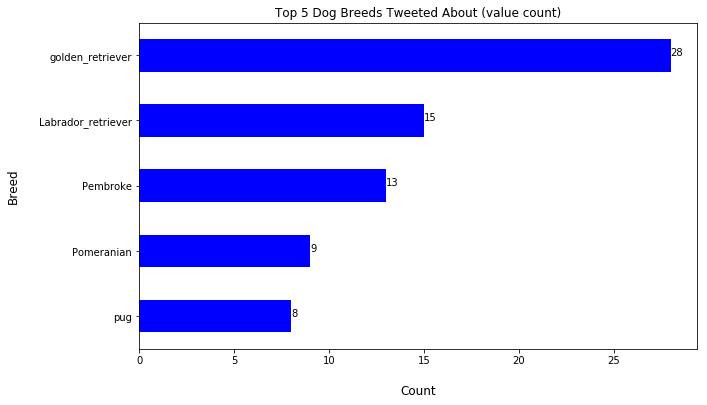

In [67]:
#Plot the top 5 breeds

plt.figure(figsize=(10,6))
master['breed'].value_counts()[0:5].sort_values(ascending=True).plot(kind='barh' , color ='blue')

#Set x & y labels, title:
plt.xlabel('\nCount',size=12)
plt.ylabel('Breed\n', size=12)
plt.title('Top 5 Dog Breeds Tweeted About (value count)' , size=12)

#Show value for each bar
for index, value in enumerate(master['breed'].value_counts()[0:5].sort_values(ascending=True)):
    plt.text(value, index, str(value))

Resource: [bar values](#https://www.youtube.com/watch?v=orQWVU4Wbkw)

**Observation:**
1. The plot clearly shows that the goldden retriever is the most popular dog to tweet about.

### Breed Analysis 

In [68]:
#Top 5 breeds by retweet count

top_breed_retweet_count = master.groupby('breed', sort=True)['retweet_count'].sum().reset_index()
top_breed_retweet_count = top_breed_retweet_count.sort_values(by ='retweet_count', ascending = False)
top_breed_retweet_count[0:5]

,breed,retweet_count
23,Labrador_retriever,121023
56,golden_retriever,107261
13,Eskimo_dog,60036
34,Pembroke,56563
24,Lakeland_terrier,52061


In [69]:
#Top 5 popular breeds by favorite count

top_breed_fav_count = master.groupby('breed', sort=True)['favorite_count'].sum().reset_index()
top_breed_fav_count = top_breed_fav_count.sort_values(by ='favorite_count', ascending = False)
top_breed_fav_count[0:5]

,breed,favorite_count
56,golden_retriever,355390
23,Labrador_retriever,292917
34,Pembroke,171001
24,Lakeland_terrier,145089
14,French_bulldog,131626


Resource: [groupby](#https://stackoverflow.com/questions/44742945/i-applied-sum-on-a-groupby-and-i-want-to-sort-the-values-of-the-last-column)

**Observations:**  
1. We can see that both the golden retriever and labrador retriever feature in the top 2 for all three analysis (value count, retweet count and favorite count).  
2. The Pembroke breed also appears in all three but it's placement can vary depending on the count being analyzed.  
3. While it did not rank within the top 5 by value count, the lakeland terrier did make the top 5 when using the retweet and favorite counts.

### Viz #2: Popularity Of Dog Stages By Value Count

In [70]:
master.dog_stages.count()

218

In [71]:
master.dog_stages.value_counts()

pupper     144
doggo      48 
puppo      19 
floofer    7  
Name: dog_stages, dtype: int64

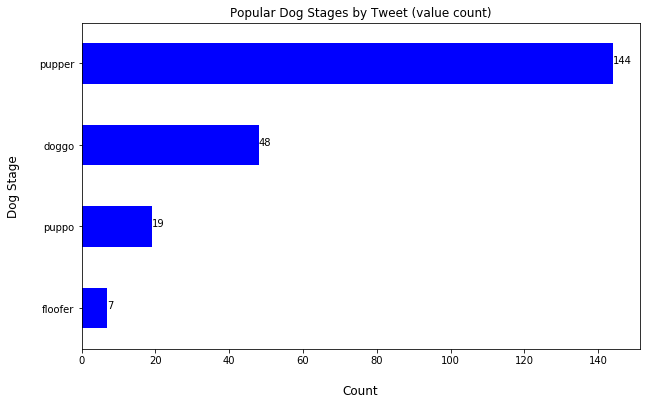

In [72]:
#Plot stages from greatest count to least

plt.figure(figsize=(10,6))
master['dog_stages'].value_counts().sort_values(ascending=True).plot(kind='barh' , color ='blue')

# Set x & y labels, title:
plt.xlabel('\nCount',size=12)
plt.ylabel('Dog Stage\n', size=12)
plt.title('Popular Dog Stages by Tweet (value count)' , size=12)

#Show value for each bar
for index, value in enumerate(master['dog_stages'].value_counts().sort_values(ascending=True)):
    plt.text(value, index, str(value))

**Observation:**  
1. The plot clearly shows that pupper is the most popular dog stage to tweet about.

### Viz #3: Popularity Of Dog Stages By Value Count - Percentage

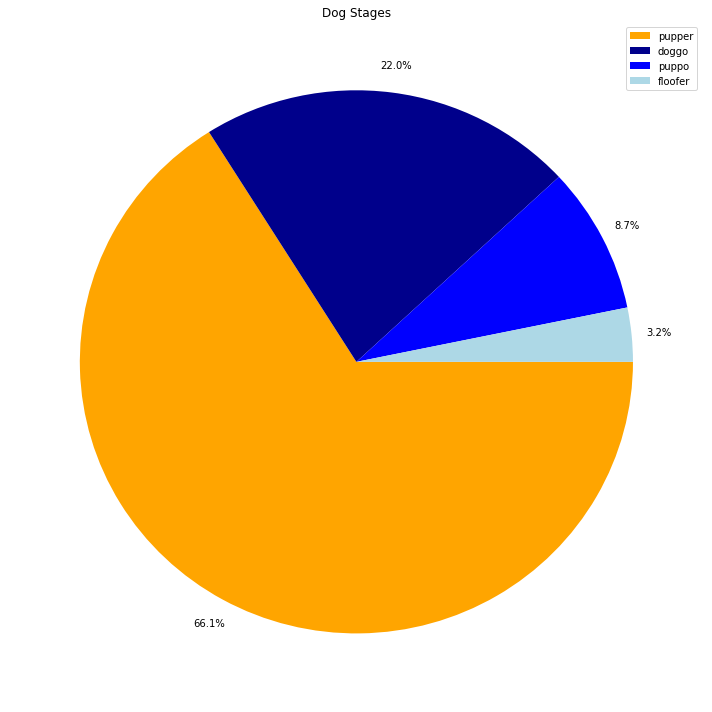

In [73]:
#Total of 218 tweets had dog stages included.

# Plot pie chart
labels = ['pupper', 'doggo', 'puppo', 'floofer']
values = master.dog_stages.value_counts(normalize=True)
colors = ['orange', 'darkblue', 'blue' ,'lightblue', 'purple']

fig, axs = plt.subplots(figsize = [10,10])
plt.pie(values, colors=colors, autopct='%1.1f%%', pctdistance=1.1, labeldistance=1.2, shadow=False, counterclock=False)
plt.legend(labels, loc=0)
plt.title('Dog Stages')
plt.tight_layout()

Resource: [pie chart](#https://stackoverflow.com/questions/21572870/percent-label-position-in-pie-chart)

**Observation:**  
1. Of the 218 tweets that contained a dog stage, a majority (66.1%) of the tweets showcased puppers.

### Dog Stages Analysis 

In [74]:
#Top 5 breeds by retweet count

top_stage_retweet_count = master.groupby('dog_stages', sort=True)['retweet_count'].sum().reset_index()
top_stage_retweet_count = top_stage_retweet_count.sort_values(by ='retweet_count', ascending = False)
top_stage_retweet_count[0:5]

,dog_stages,retweet_count
2,pupper,368212
0,doggo,364553
3,puppo,124478
1,floofer,34781


In [75]:
#Top 5 popular breeds by favorite count
#https://stackoverflow.com/questions/44742945/i-applied-sum-on-a-groupby-and-i-want-to-sort-the-values-of-the-last-column

top_stage_fav_count = master.groupby('dog_stages', sort=True)['favorite_count'].sum().reset_index()
top_stage_fav_count = top_stage_fav_count.sort_values(by ='favorite_count', ascending = False)
top_stage_fav_count[0:5]

,dog_stages,favorite_count
2,pupper,1158974
0,doggo,986705
3,puppo,423856
1,floofer,92442


**Observation:**  
1. The four dog stages rank in the same order for all three analysis (value count, retweet count and favorite count) with pupper coming in first.

### Viz #4: Popularity Of Dog Names By Value Count

In [76]:
#Check names

master.name.unique()

array(['Cassie', 'None', 'Stuart', 'Roscoe', 'Yogi', 'Grizzwald', 'Gus',
       'a', 'Snoopy', 'Ginger', 'Jed', 'Sebastian', 'Sierra', 'Rover',
       'Napolean', 'Scout', 'Shikha', 'Jamesy', 'Boomer', 'Barney',
       'Mimosa', 'Pickles', 'Clark', 'Gidget', 'Rhino', 'Smiley', 'Miguel',
       'Emanuel', 'Pete', 'Astrid', 'Doobert', 'Kona', 'Loki', 'Cupid',
       'Pilot', 'Pablo', 'Gabe', 'Duchess', 'Sundance', 'Oliver', 'Bo',
       'Cooper', 'Chubbs', 'Rocky', 'Craig', 'Ollie', 'Diogi', 'Doc',
       'Sobe', 'Lily', 'Tonks', 'Rizzo', 'Deacon', 'Sampson', 'Sophie',
       'Huck', 'Finley', 'Chelsea', 'Willem', 'Louie', 'Wishes', 'Jax',
       'Milo', 'Zoe', 'Finn', 'Blu', 'Divine', 'Abby', 'Kilo', 'Aqua',
       'Benji', 'Bayley', 'Kellogg', 'Buckley', 'Moose', 'Rooney',
       'Rueben', 'Lillie', 'Ashleigh', 'Smokey', 'Chuckles', 'Finnegus',
       'Adele', 'Ambrose', 'Scooter', 'Sansa', 'Millie', 'just', 'Lorenzo',
       'Grady', 'Wally', 'Gizmo', 'Lucy', 'Trip', 'Blakely', 'Mona'

In [77]:
#Create df for rows that contain only dog names

df2 = master[(master.name !="None") & (master.name !="a") & (master.name !="the") & (master.name !='one')]
df2.name.unique()

array(['Cassie', 'Stuart', 'Roscoe', 'Yogi', 'Grizzwald', 'Gus', 'Snoopy',
       'Ginger', 'Jed', 'Sebastian', 'Sierra', 'Rover', 'Napolean',
       'Scout', 'Shikha', 'Jamesy', 'Boomer', 'Barney', 'Mimosa',
       'Pickles', 'Clark', 'Gidget', 'Rhino', 'Smiley', 'Miguel',
       'Emanuel', 'Pete', 'Astrid', 'Doobert', 'Kona', 'Loki', 'Cupid',
       'Pilot', 'Pablo', 'Gabe', 'Duchess', 'Sundance', 'Oliver', 'Bo',
       'Cooper', 'Chubbs', 'Rocky', 'Craig', 'Ollie', 'Diogi', 'Doc',
       'Sobe', 'Lily', 'Tonks', 'Rizzo', 'Deacon', 'Sampson', 'Sophie',
       'Huck', 'Finley', 'Chelsea', 'Willem', 'Louie', 'Wishes', 'Jax',
       'Milo', 'Zoe', 'Finn', 'Blu', 'Divine', 'Abby', 'Kilo', 'Aqua',
       'Benji', 'Bayley', 'Kellogg', 'Buckley', 'Moose', 'Rooney',
       'Rueben', 'Lillie', 'Ashleigh', 'Smokey', 'Chuckles', 'Finnegus',
       'Adele', 'Ambrose', 'Scooter', 'Sansa', 'Millie', 'just', 'Lorenzo',
       'Grady', 'Wally', 'Gizmo', 'Lucy', 'Trip', 'Blakely', 'Mona',
       'Oli

In [78]:
df2.name.value_counts()['Jamesy']

1

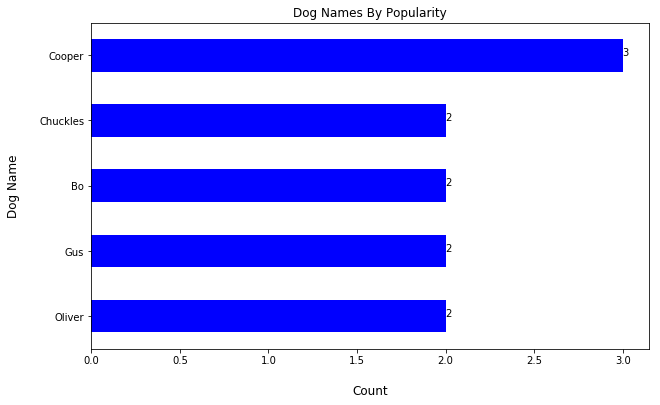

In [79]:
#Chart top 5 dog names

plt.figure(figsize=(10,6))
df2['name'].value_counts()[0:5].sort_values(ascending=True).plot(kind='barh' , color ='blue')

# Set x & y labels, title:
plt.xlabel('\nCount',size=12)
plt.ylabel('Dog Name\n', size=12)
plt.title('Dog Names By Popularity' , size=12)

#Show value for each bar
for index, value in enumerate(df2['name'].value_counts()[0:5].sort_values(ascending=True)):
    plt.text(value, index, str(value))

**Observation:**  
1. Cooper was the most popular name.

### Dog Name Analysis

In [80]:
df_retweet_name = df2.groupby('name', sort=True)['retweet_count'].sum().reset_index()
df_retweet_name = df_retweet_name.sort_values(by ='retweet_count', ascending = False)
df_retweet_name[0:5]

,name,retweet_count
15,Bo,46809
53,Jamesy,32883
41,Gabe,17209
8,Barney,13076
28,Cupid,11878


In [81]:
df_fav_name = df2.groupby('name', sort=True)['favorite_count'].sum().reset_index()
df_fav_name = df_fav_name.sort_values(by ='favorite_count', ascending = False)
df_fav_name[0:5]

,name,favorite_count
15,Bo,109460
53,Jamesy,106827
8,Barney,48410
28,Cupid,40325
6,Astrid,38074


**Observations:**  
1. We can see that both Bo and Jamesy feature in the top 2 when the name retweet and favorite counts are anylized. Barney and Cupie also appear in both but they're placement can vary depending on the count being analyzed.

2. None of the popular names by retweet and favorite count appear in the popularity by value count list.